# Informations

University of Zurich, <br>
Network Science, <br>
Assignment 6

Pietro Bonazzi, <br>
LEGI 17-200-635, <br>
pietro.bonazzi@uzh.ch

# Lib

In [112]:
%run functions.ipynb

In [8]:
folder="Data/6/Data/"
filenames=all_files(folder)
filenames.sort()
print(filenames)

['WDN_1992.txt.graphml', 'WDN_1993.txt.graphml', 'WDN_1994.txt.graphml', 'WDN_1995.txt.graphml', 'WDN_1996.txt.graphml', 'WDN_1997.txt.graphml', 'WDN_1998.txt.graphml', 'WDN_1999.txt.graphml', 'WDN_2000.txt.graphml', 'WDN_2001.txt.graphml', 'WDN_2002.txt.graphml']


# A06.1 - Exponential Random Graph Models

Task: For the World Trade Web dataset, fit different ERGM-based Configuration Models and compare basic network metrics with null models. For each of the WTW networks provided:

+ measure the average clustering and reciprocity coefficients
+ fit the Undirected Binary CM and Directed Binary CM
+ sample 10 networks from the obtained distributions and measure clustering and reciprocity (for the Directed ones)
+ plot clustering and reciprocity as functions of time, comparing the real value with the average from the sampled networks

In [ ]:
time, orig_clust, orig_rec, = [], [], []

for i in range(len(filenames)):
    time.append(int(filenames[i][4:-12]))
    
    graph=load_graph(folder+filenames[i])
    orig_clust.append(avg_clustering(graph))
    orig_rec.append(avg_reciprocity(graph))
    
    udg=init_UndirectedGraph(graph)
    dg=init_DirectedGraph(graph)
    sample_networks(udg, "Bonazzi_Pietro_EX6_samples/"+filenames[i][:-12]+"/undirected/", "cm", 10)
    sample_networks(dg, "Bonazzi_Pietro_EX6_samples/"+filenames[i][:-12]+"/directed/", "dcm", 10)

In [90]:
sampl_clust_dir, sampl_clust_undir, sampl_rec = [], [], []

for i in range(len(filenames)):

    clust = []

    for j in range(10):
        edgelist_ens = np.loadtxt("Bonazzi_Pietro_EX6_samples/"+filenames[i][:-12]+"/undirected/"+str(j)+".txt")
        net = nx.Graph()
        net.add_edges_from(edgelist_ens)
        clust.append(avg_clustering(net))
    
    sampl_clust_undir.append(sum(clust)/len(clust))
    
    clust, rec = [], []
    
    for j in range(10):
        edgelist_ens = np.loadtxt("Bonazzi_Pietro_EX6_samples/"+filenames[i][:-12]+"/directed/"+str(j)+".txt")
        net = nx.Graph()
        net.add_edges_from(edgelist_ens)
        clust.append(avg_clustering(net))
        rec.append(avg_reciprocity(net))
    
    sampl_clust_dir.append(sum(clust)/len(clust))
    sampl_rec.append(sum(rec)/len(rec))

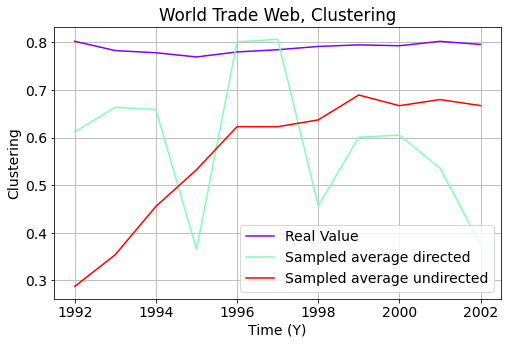

In [113]:
data = [orig_clust,sampl_clust_dir, sampl_clust_undir]
labels=["Real Value", "Sampled average directed","Sampled average undirected"]

plot_cmm_x(time, data=data, xlabel="Time (Y)", ylabel="Clustering", labels=labels, title="World Trade Web, Clustering", size=[8,5])

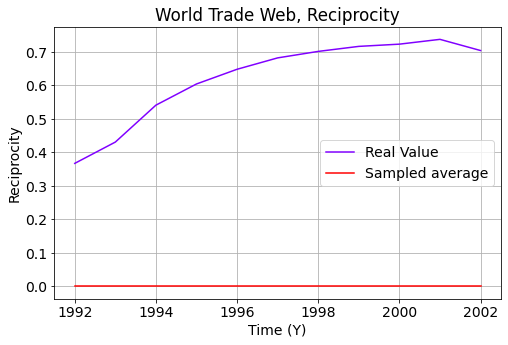

In [114]:
data = [orig_rec, sampl_rec]
labels=["Real Value", "Sampled average"]

plot_cmm_x(time, data=data, xlabel="Time (Y)", ylabel="Reciprocity", labels=labels, title="World Trade Web, Reciprocity", size=[8,5])

# A06.2 - Weighted ERGMs
Task: Repeat the analysis of point 1 with weighted networks
+ measure strength assortativity coefficient on the data
+ fit the Undirected Enhanced CM and Directed Enhanced CM using the CReMa method
+ sample 10 networks from the obtained distributions and measure strength assortativity
+ plot strength assortativity as a function of time, comparing the real value with the average from the sampled networks
+ in the directed case, plot all pairs of assortativity (in-in, in-out, out-out)

In [ ]:
time, orig_ass = [], []

for i in range(len(filenames)):
    time.append(int(filenames[i][4:-12]))
    
    graph=load_graph(folder+filenames[i])
    orig_ass.append(compute_assortativity_coeff(graph))
    
    udg=init_UndirectedGraph(graph)
    dg=init_DirectedGraph(graph)
    sample_networks(udg, "Bonazzi_Pietro_EX6_samples/weighted/"+filenames[i][:-12]+"/undirected/", "crema", 10, False)
    sample_networks(dg, "Bonazzi_Pietro_EX6_samples/weighted/"+filenames[i][:-12]+"/directed/", "crema", 10, True)

In [102]:
sampl_und_ass, sampl_dir_ass = [], []

for i in range(len(filenames)):

    ass = []

    for j in range(10):
        edgelist_ens = np.loadtxt("Bonazzi_Pietro_EX6_samples/weighted/"+filenames[i][:-12]+"/undirected/"+str(j)+".txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                        is_directed = False,
                                        is_sparse = False,
                                        is_weighted = True)
        net = nx.from_numpy_array(ens_adj)
        ass.append(compute_assortativity_coeff(net))
    sampl_und_ass.append(sum(ass)/len(ass))
    
    ass = []
    
    for j in range(10):
        edgelist_ens = np.loadtxt("Bonazzi_Pietro_EX6_samples/weighted/"+filenames[i][:-12]+"/directed/"+str(j)+".txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                        is_directed = True,
                                        is_sparse = False,
                                        is_weighted = True)
        net = nx.from_numpy_array(ens_adj)
        ass.append(compute_assortativity_coeff(net))
        
    sampl_dir_ass.append(sum(ass)/len(ass))

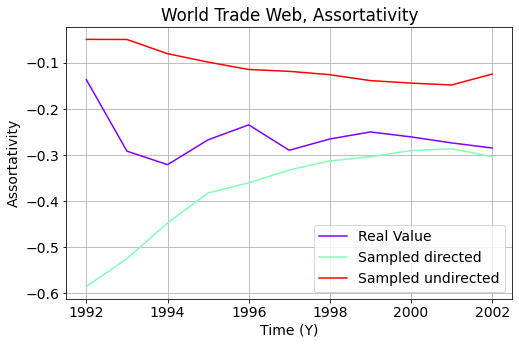

In [115]:
data = [orig_ass,sampl_dir_ass, sampl_und_ass]
labels=["Real Value", "Sampled directed","Sampled undirected"]

plot_cmm_x(time, data=data, xlabel="Time (Y)", ylabel="Assortativity", labels=labels, title="World Trade Web, Assortativity", size=[8,5])

# A06.3 - Drawing conclusions

Task: write a short paragraph to draw conclusions about the structure of the World Trade Web based on the ERGM
inferential approach. You should include at least the following points:

+ Comment on the interpretation of the clustering and reciprocity coefficients found in the original data

For 10 years starting in 1992, the clustering coefficient of the WTW has been practically fixed at around 0.8, whereas the reciprocity coefficient increased every year (with the exception of the last year -2002) from a 0.4 to a 0.7 . In this decade, nations continued to trade with the same partners and the likelihood of bilateral trades between countries increased significantly.  

+ Comment on the interpretation of strength assortativity for this dataset

On the other side, the assortativity coefficient of the WTW has overall decreased, scoring at -0.3 in 2002.
The most active (corr. unactive) nations in terms of trades, do not usually trade with their competitors. 

+ Comment on the conclusions you can draw via the inference of the UBCM, DBCM and DECM models

UBCM Undirected Binary Configuration Model are more suited to predict clustering than DBCM Directed Binary CM. 
Finally, DECM Directed Enhanced CM can be trained to predict real assortativity coeff.  